In [2]:
import pandas as pd 
import os

df=pd.read_csv('/home/ut01/Desktop/Stanley/IITK Oswald sir/IVF/Codes/Dataset/cleaned1.csv')
df.info()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375298 entries, 0 to 375297
Data columns (total 46 columns):
 #   Column                                                          Non-Null Count   Dtype
---  ------                                                          --------------   -----
 0   Unnamed: 0                                                      375298 non-null  int64
 1   Patient Age at Treatment                                        375298 non-null  int64
 2   Total Number of Previous cycles, Both IVF and DI                375298 non-null  int64
 3   Total Number of Previous treatments, Both IVF and DI at clinic  375298 non-null  int64
 4   Total Number of Previous IVF cycles                             375298 non-null  int64
 5   Total number of previous pregnancies, Both IVF and DI           375298 non-null  int64
 6   Total number of IVF pregnancies                                 375298 non-null  int64
 7   Total number of DI pregnancies                          

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375298 entries, 0 to 375297
Data columns (total 46 columns):
 #   Column                                                          Non-Null Count   Dtype
---  ------                                                          --------------   -----
 0   Unnamed: 0                                                      375298 non-null  int64
 1   Patient Age at Treatment                                        375298 non-null  int64
 2   Total Number of Previous cycles, Both IVF and DI                375298 non-null  int64
 3   Total Number of Previous treatments, Both IVF and DI at clinic  375298 non-null  int64
 4   Total Number of Previous IVF cycles                             375298 non-null  int64
 5   Total number of previous pregnancies, Both IVF and DI           375298 non-null  int64
 6   Total number of IVF pregnancies                                 375298 non-null  int64
 7   Total number of DI pregnancies                          

In [4]:
y = df['Live Birth Occurrence']
X = df.drop('Live Birth Occurrence', axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375298 entries, 0 to 375297
Data columns (total 45 columns):
 #   Column                                                          Non-Null Count   Dtype
---  ------                                                          --------------   -----
 0   Unnamed: 0                                                      375298 non-null  int64
 1   Patient Age at Treatment                                        375298 non-null  int64
 2   Total Number of Previous cycles, Both IVF and DI                375298 non-null  int64
 3   Total Number of Previous treatments, Both IVF and DI at clinic  375298 non-null  int64
 4   Total Number of Previous IVF cycles                             375298 non-null  int64
 5   Total number of previous pregnancies, Both IVF and DI           375298 non-null  int64
 6   Total number of IVF pregnancies                                 375298 non-null  int64
 7   Total number of DI pregnancies                          

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [6]:

parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ( 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

DT_grid  = GridSearchCV(DecisionTreeClassifier(), parameters, verbose = True)

DT_grid.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (3, 5, 7, 9, 10, 15, 20, 25),
                         'max_features': ('sqrt', 'log2'),
                         'min_samples_split': (2, 4, 6)},
             verbose=True)

In [7]:
DT_grid.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=4)

In [8]:
DT_Model = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt')
DT_Model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt')

In [9]:
print (f'Train Accuracy - : {DT_Model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {DT_Model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.994
Test Accuracy - : 0.993


In [10]:
y_true, y_pred = y_test , DT_Model.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56281
           1       0.99      1.00      0.99     56309

    accuracy                           0.99    112590
   macro avg       0.99      0.99      0.99    112590
weighted avg       0.99      0.99      0.99    112590



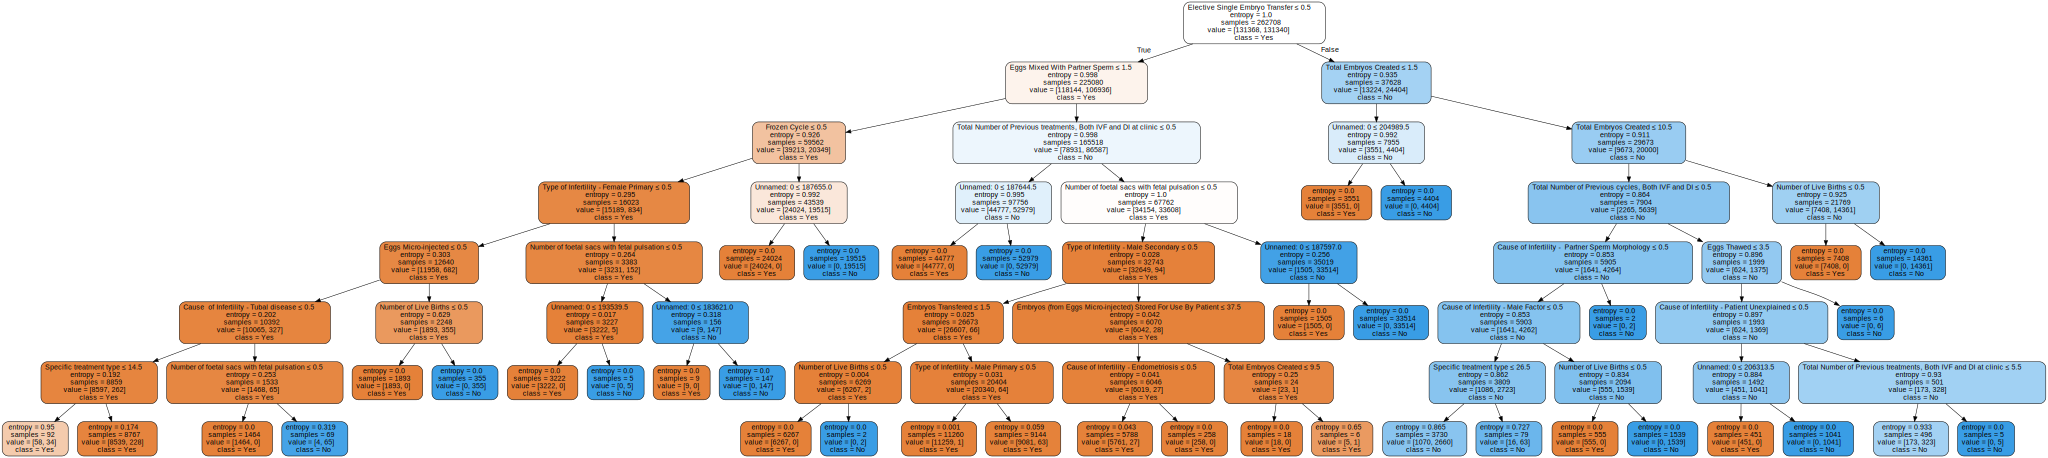

In [11]:
dot_data = export_graphviz(DT_Model,   
                      out_file=None, 
                      feature_names=X.columns,       #Provide X Variables Column Names 
                      class_names=['Yes','No'],      # Provide Target Variable Column Name
                      filled=True, rounded=True,     # Controls the look of the nodes and colours it
                      special_characters=True)  

graph = graphviz.Source(dot_data)
# graph.render('pic',format='png', view=False)
graph.render('pic', format='png',view=False)

graph